In [1]:
#task 1
!pip install yfinance pandas matplotlib


  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     --------------------------

In [2]:
#Task 2: Import Libraries

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
#Task 3: Fetch Crypto Data

# Define crypto symbol and date range
crypto_symbol = "BTC-USD"
start_date = "2025-01-01"
end_date = "2025-12-03"

# Download crypto data
crypto_data = yf.download(crypto_symbol, start=start_date, end=end_date)

# ---------------------------
# VALIDATION 1: Check if data downloaded
# ---------------------------
if crypto_data.empty:
    raise ValueError("No crypto data found! Check symbol or internet connection.")
else:
    print("Data successfully downloaded!\n")

# ---------------------------
# VALIDATION 2: Check required columns
# ---------------------------
required_cols = ["Open", "High", "Low", "Close", "Volume"]

for col in required_cols:
    if col not in crypto_data.columns:
        raise ValueError(f"Missing required column: {col}")

print("All required columns are present.\n")

# Display first 5 rows
print("First 5 rows of dataset:")
print(crypto_data.head())


/tmp/ipython-input-1516352934.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  crypto_data = yf.download(crypto_symbol, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed

Data successfully downloaded!

All required columns are present.

First 5 rows of dataset:
Price              Close          High           Low          Open  \
Ticker           BTC-USD       BTC-USD       BTC-USD       BTC-USD   
Date                                                                 
2025-01-01  94419.757812  94929.867188  92788.125000  93425.101562   
2025-01-02  96886.875000  97739.820312  94201.570312  94416.289062   
2025-01-03  98107.429688  98956.914062  96034.617188  96881.726562   
2025-01-04  98236.226562  98734.429688  97562.976562  98106.992188   
2025-01-05  98314.960938  98813.304688  97291.765625  98233.906250   

Price            Volume  
Ticker          BTC-USD  
Date                     
2025-01-01  24519888919  
2025-01-02  46009564411  
2025-01-03  35611391163  
2025-01-04  22342608078  
2025-01-05  20525254825  


In [6]:
#Task 4: Check & Handle Missing Values

# Check missing values
print("\nMissing values before cleaning:")
print(crypto_data.isnull().sum())

# ---------------------------
# VALIDATION 3: Handle missing values
# ---------------------------
# Fill missing values using forward fill
crypto_data.fillna(method="ffill", inplace=True)

# Backward fill as backup
crypto_data.fillna(method="bfill", inplace=True)

print("\nMissing values after cleaning:")
print(crypto_data.isnull().sum())



Missing values before cleaning:
Price   Ticker 
Close   BTC-USD    0
High    BTC-USD    0
Low     BTC-USD    0
Open    BTC-USD    0
Volume  BTC-USD    0
dtype: int64

Missing values after cleaning:
Price   Ticker 
Close   BTC-USD    0
High    BTC-USD    0
Low     BTC-USD    0
Open    BTC-USD    0
Volume  BTC-USD    0
dtype: int64


/tmp/ipython-input-3340419844.py:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  crypto_data.fillna(method="ffill", inplace=True)
/tmp/ipython-input-3340419844.py:14: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  crypto_data.fillna(method="bfill", inplace=True)


In [7]:
#Task 5: Save Cleaned Data

crypto_data.to_csv("crypto_data.csv")
print("\nData saved successfully as 'crypto_data.csv'")



Data saved successfully as 'crypto_data.csv'


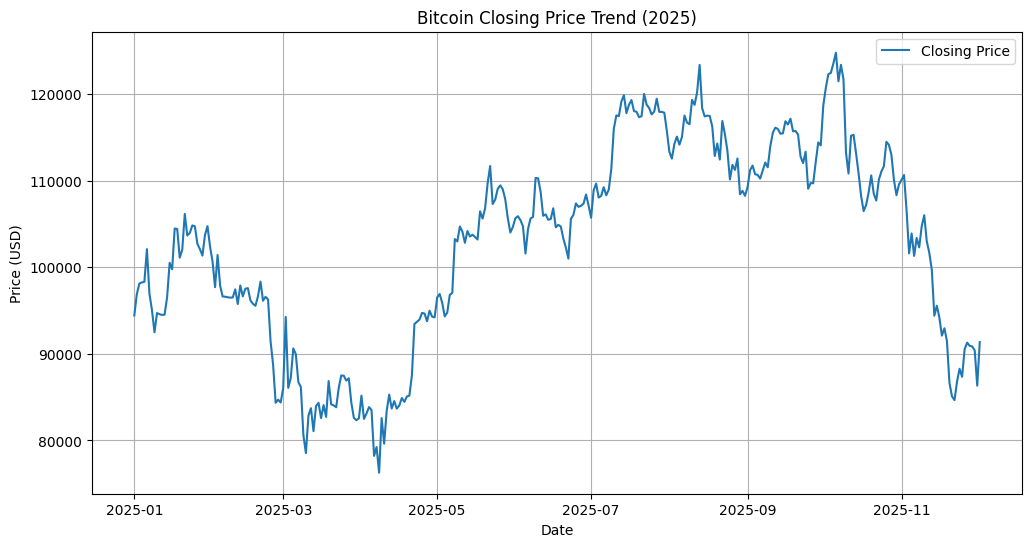

In [8]:
#Task 6: Visualize Closing Price Trend

plt.figure(figsize=(12,6))
plt.plot(crypto_data.index, crypto_data["Close"], label="Closing Price")
plt.title("Bitcoin Closing Price Trend (2025)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.show()
